<a href="https://colab.research.google.com/github/rghosh8/OMSCS/blob/main/CS7641_Supervised_Learning_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.datasets import load_iris, load_wine, load_breast_cancer, load_digits
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn import metrics
from google.colab import files
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
import time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),'recall':make_scorer(recall_score)}

In [2]:
breast_cancer, digits = load_breast_cancer(), load_digits()

## Breast Cancer Data

In [3]:
def best_estimator(data_spec, clf, parameter_grid):
  X, y = data_spec.data, data_spec.target
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=42)
  search_clf = GridSearchCV(clf(), parameter_grid, scoring='f1_micro', refit='accuracy', cv=5, n_jobs=-1)
  search_clf.fit(X_train, y_train)
  return search_clf.best_estimator_

In [4]:
MLPClassifier()

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [5]:
tree_parameter_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [4, 6, 12], 'max_leaf_nodes': [2, 4, 8]}
svc_parameter_grid=[{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],'C': [1, 10, 100, 1000]}, {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
knn_parameter_grid={'n_neighbors': [4, 6, 8], 'leaf_size': [15, 30, 45, 60]}
gb_parameter_grid={'learning_rate': [0.1, 0.3, 0.5, 0.8], 'subsample': [0.15, 0.3, 0.45, 0.6, 0.75], 'n_estimators': [3, 10, 30, 90], 'max_depth': [3, 10, 25]}
nn_parameter_grid={'hidden_layer_sizes': [50, 100, 150], 'solver': ['lbfgs', 'sgd', 'adam'], 'activation': ['identity', 'logistic', 'tanh', 'relu'], 'early_stopping':[False, True]}

clf_nn=best_estimator(breast_cancer, MLPClassifier, nn_parameter_grid)
# clf_knn=best_estimator(breast_cancer, KNeighborsClassifier, knn_parameter_grid)
# clf_dt=best_estimator(breast_cancer, tree.DecisionTreeClassifier, tree_parameter_grid)


In [6]:
clf_nn

MLPClassifier(activation='identity', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=150, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [7]:
clf_tree = tree.DecisionTreeClassifier(max_depth=6, min_samples_leaf=4, max_leaf_nodes=4)
clf_svm = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", SVC(C=10, kernel='linear', gamma='scale')),
    ])

clf_knn = KNeighborsClassifier(n_neighbors=4, leaf_size=15)
clf_gb = GradientBoostingClassifier(n_estimators=30, learning_rate=0.3, max_depth=3, subsample=0.45)
clf_nn = MLPClassifier(solver='adam', alpha=1e-4, hidden_layer_sizes=(150, ), random_state=1, activation='logistic', early_stopping=False)

In [18]:
 class Performance(object):
   def __init__(self, training_size=[0.2, 0.25, 0.3, 0.35, 0.4], classifier_list = [clf_tree, clf_svm, clf_knn, clf_gb, clf_nn]):
     self.training_size=training_size
     self.classifier_list = classifier_list

   def score(self, X, y, clf):
     training_perf_arr, test_perf_arr = np.array([]), np.array([])
     for size in self.training_size:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=42)
        t1=time.time()
        clf.fit(X_train, y_train)
        print(f'training time for {clf} is {time.time()-t1}')
        y_pred_train=clf.predict(X_train)
        t2=time.time()
        y_pred_test=clf.predict(X_test)
        print(f'inference time for {clf} is {time.time()-t2}')
        training_perf = f1_score(y_train, y_pred_train, average='weighted')
        training_perf_arr=np.append(training_perf_arr,training_perf)
        test_perf = f1_score(y_test, y_pred_test, average='weighted')
        test_perf_arr=np.append(test_perf_arr,test_perf)
        cv_scores = cross_val_score(clf, X, y, cv=5)
        print(clf, cv_scores)

     return training_perf_arr, test_perf_arr, cv_scores

   def plot(self, X, y):
       fig, axs = plt.subplots(len(self.classifier_list), 1, figsize=(20, 12))
       plot_titles = ['(a) Decision Tree Classifier', '(b) SVM Classifier', '(c) KNN Classifier', '(d) Gradient Boosting Classifier', '(e) Neural Network Classifier']
       for clf, ax, title in zip(self.classifier_list, axs.flatten(), plot_titles):
        training_perf_arr, test_perf_arr, cv_scores = self.score(X, y, clf)
        ax.plot(1-np.array(self.training_size), training_perf_arr, 'o-', label="Training")
        ax.plot(1-np.array(self.training_size), test_perf_arr, 's-', label="Testing")
        ax.set_xlabel("Training Size")
        ax.set_ylabel("F1 Score")
        ax.set_title(title)
        ax.legend()
        fig.tight_layout()

      #  return training_perf_arr, test_perf_arr



training time for DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=8,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is 0.0047109127044677734
inference time for DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=8,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is 0.0005252361297607422
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gin

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

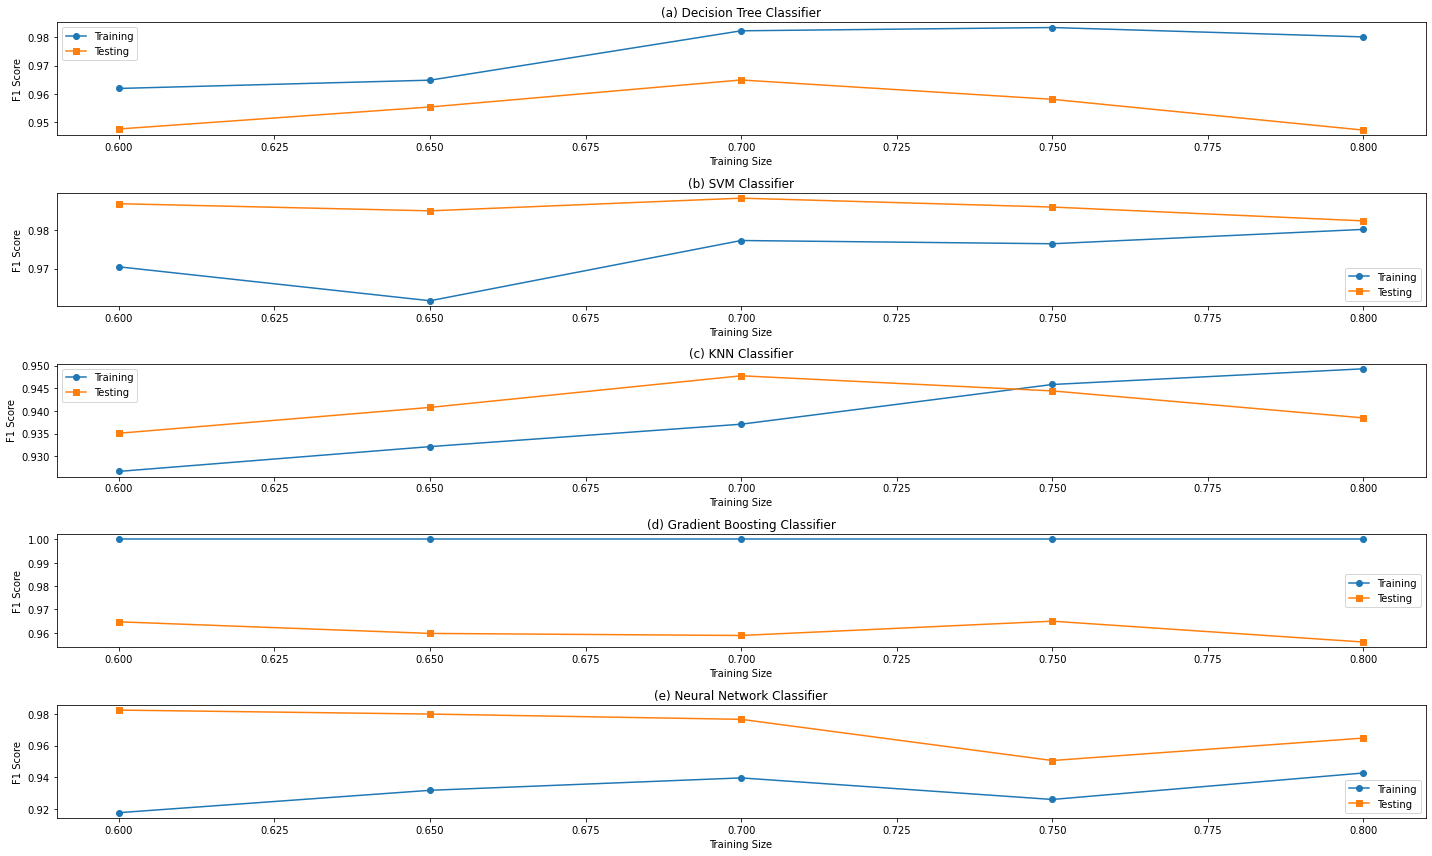

In [19]:
X, y = breast_cancer.data, breast_cancer.target
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=42)
obj=Performance()
obj.plot(X, y)

# plt.savefig("breast_cancer.png")
# files.download("breast_cancer.png")

## Digits Dataset

In [10]:
def best_estimator(data_spec, clf, parameter_grid):
  X, y = data_spec.data, data_spec.target
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=42)
  search_clf = GridSearchCV(clf(), parameter_grid, scoring='f1_micro', refit='accuracy', cv=5, n_jobs=-1)
  search_clf.fit(X_train, y_train)
  return search_clf.best_estimator_

In [11]:
tree_parameter_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [4, 6, 12], 'max_leaf_nodes': [2, 4, 8]}
svc_parameter_grid=[{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],'C': [1, 10, 100, 1000]}, {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
knn_parameter_grid={'n_neighbors': [4, 6, 8], 'leaf_size': [15, 30, 45, 60]}
gb_parameter_grid={'learning_rate': [0.1, 0.3, 0.5, 0.8], 'subsample': [0.15, 0.3, 0.45, 0.6, 0.75], 'n_estimators': [3, 10, 30, 90], 'max_depth': [3, 10, 25]}
nn_parameter_grid={'hidden_layer_sizes': [50, 100, 150], 'solver': ['lbfgs', 'sgd', 'adam'], 'activation': ['identity', 'logistic', 'tanh', 'relu'], 'early_stopping':[False, True]}

# clf_dt=best_estimator(digits, tree.DecisionTreeClassifier, tree_parameter_grid)
# clf_svc=best_estimator(digits, SVC, svc_parameter_grid)
# clf_knn=best_estimator(digits, KNeighborsClassifier, knn_parameter_grid)
# clf_gb=best_estimator(digits, GradientBoostingClassifier, gb_parameter_grid)
clf_nn=best_estimator(digits, MLPClassifier, nn_parameter_grid)

In [12]:
clf_nn

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=50, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [20]:
clf_tree = tree.DecisionTreeClassifier(max_depth=6, min_samples_leaf=4, max_leaf_nodes=8)
clf_svm = Pipeline([
        ("scaler", StandardScaler()),
        ("radial_svc", SVC(C=100, kernel='rbf', gamma=0.0001)),
    ])

clf_knn = KNeighborsClassifier(n_neighbors=4, leaf_size=15)
clf_gb = GradientBoostingClassifier(n_estimators=90, learning_rate=0.1, max_depth=10, subsample=0.6)
clf_nn = MLPClassifier(solver='adam', alpha=1e-4, hidden_layer_sizes=(100, ), random_state=None, activation='logistic', early_stopping=False)

In [21]:
class Performance(object):
   def __init__(self, training_size=[0.2, 0.25, 0.3, 0.35, 0.4], classifier_list = [clf_tree, clf_svm, clf_knn, clf_gb, clf_nn]):
     self.training_size=training_size
     self.classifier_list = classifier_list

   def score(self, X, y, clf):
     training_perf_arr, test_perf_arr = np.array([]), np.array([])
     for size in self.training_size:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=42)
        t1=time.time()
        clf.fit(X_train, y_train)
        print(f'training time for {clf} is {time.time()-t1}')
        y_pred_train=clf.predict(X_train)
        t2=time.time()
        y_pred_test=clf.predict(X_test)
        print(f'inference time for {clf} is {time.time()-t2}')
        training_perf = f1_score(y_train, y_pred_train, average='weighted')
        training_perf_arr=np.append(training_perf_arr,training_perf)
        test_perf = f1_score(y_test, y_pred_test, average='weighted')
        test_perf_arr=np.append(test_perf_arr,test_perf)
        cv_scores = cross_val_score(clf, X, y, cv=5)
        print(clf, cv_scores)

     return training_perf_arr, test_perf_arr, cv_scores

   def plot(self, X, y):
       fig, axs = plt.subplots(len(self.classifier_list), 1, figsize=(20, 12))
       plot_titles = ['(a) Decision Tree Classifier', '(b) SVM Classifier', '(c) KNN Classifier', '(d) Gradient Boosting Classifier', '(e) Neural Network Classifier']
       for clf, ax, title in zip(self.classifier_list, axs.flatten(), plot_titles):
        training_perf_arr, test_perf_arr, cv_scores = self.score(X, y, clf)
        ax.plot(1-np.array(self.training_size), training_perf_arr, 'o-', label="Training")
        ax.plot(1-np.array(self.training_size), test_perf_arr, 's-', label="Testing")
        ax.set_xlabel("Training Size")
        ax.set_ylabel("F1 Score")
        ax.set_title(title)
        ax.legend()
        fig.tight_layout()

      #  return training_perf_arr, test_perf_arr


training time for DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=8,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is 0.01019287109375
inference time for DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=8,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is 0.0005695819854736328
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
 

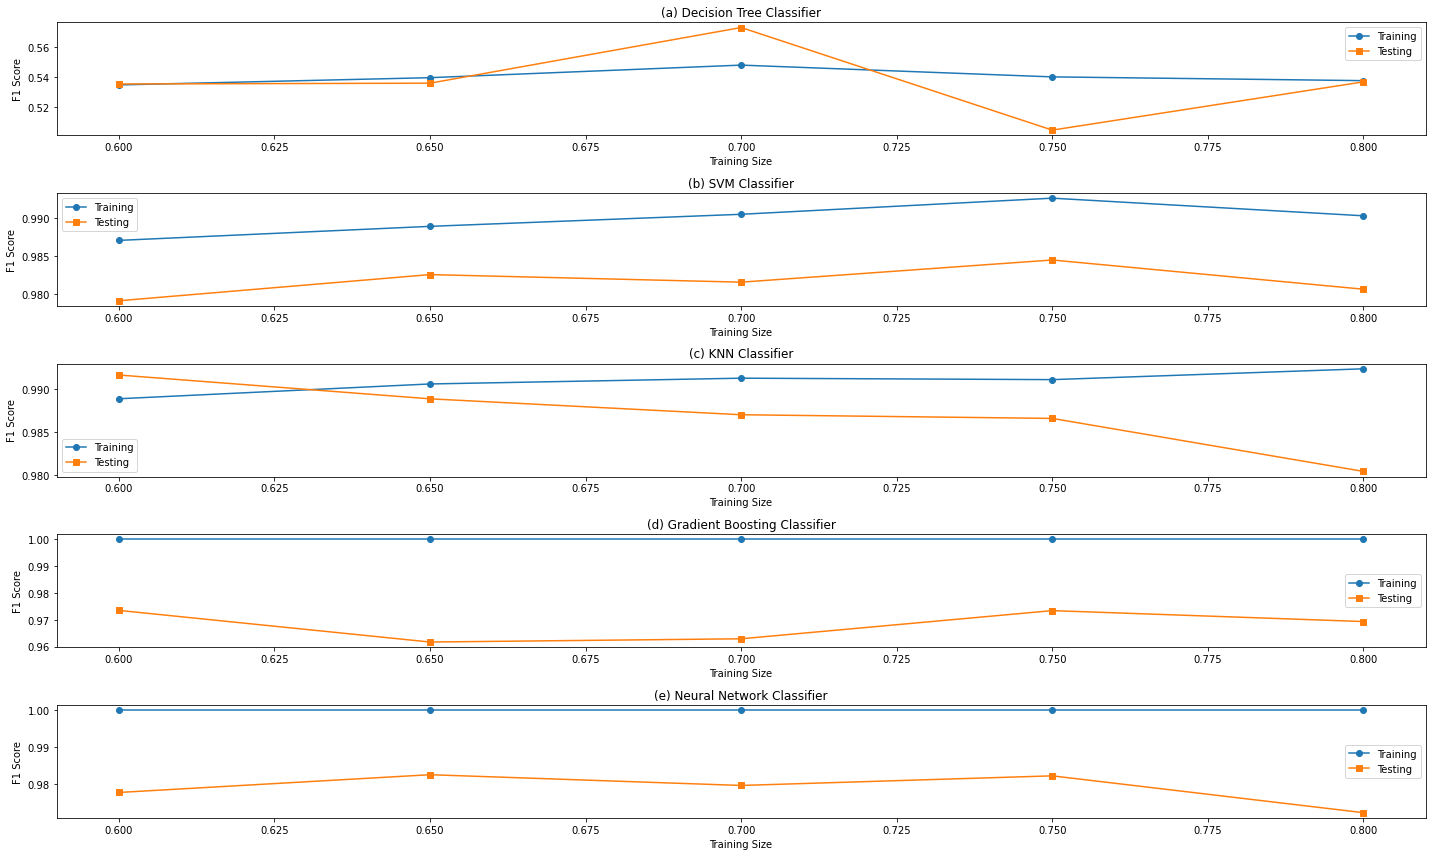

In [22]:
X, y = digits.data, digits.target
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=42)
obj=Performance()
obj.plot(X, y)

# plt.savefig("digit_result.png")
# files.download("digit_result.png")